# 1. Problem Solving ❓

Permasalahan yang dapat diselesaikan pada project ini adalah memprediksi gambar apakah termasuk kelas cat, deer, dog, atau horse.

Rumusan masalah project ini sebagai berikut.
1. Apa model dan parameter yang digunakan dan bagaimana akurasinya?
2. Bagaimana persebaran data masing-masing kelasnya?

# 2. Data Acquisition 🔎

Menggunakan dataset yang telah disediakan

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

****Import Library yang Digunakan****

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import os

from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [ ]:
path = '/kaggle/input/ofa-ai-mastery-computer-vision'

In [ ]:
names = []
nums = []
data = {'Name of class':[],'Number of samples':[]}

for i in os.listdir(path+'/train'):
    nums.append(len(os.listdir(path+'/train/'+i)))
    names.append(i)

data['Name of class']+=names
data['Number of samples']+=nums

df = pd.DataFrame(data)
df

,Name of class,Number of samples
0,horse,600
1,dog,900
2,cat,700
3,deer,600


<AxesSubplot:xlabel='Name of class', ylabel='Number of samples'>

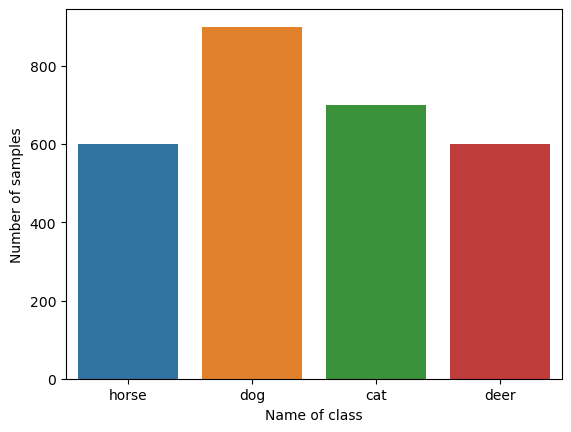

In [ ]:
sns.barplot(x=df['Name of class'],y=df['Number of samples'])

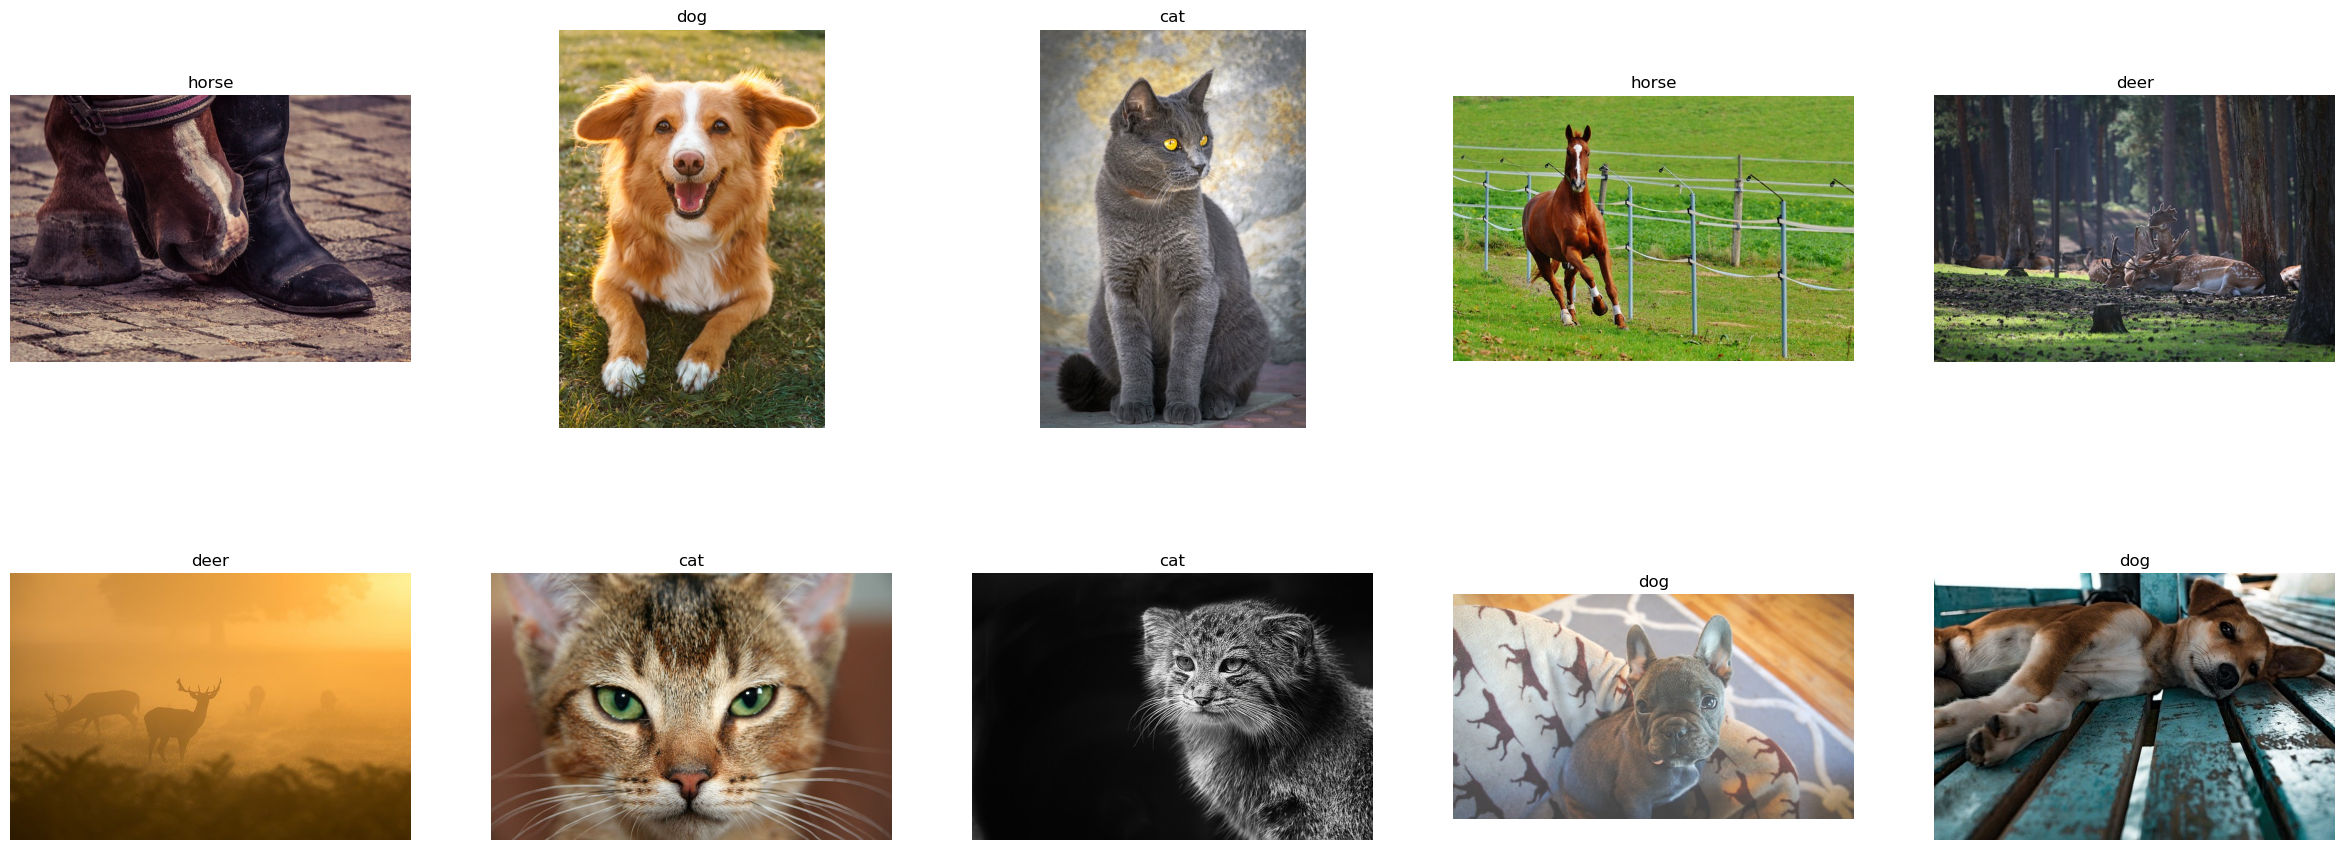

In [ ]:
classes = os.listdir(path+'/train')

plt.figure(figsize=(30 , 30))
for x in range(10):
    i = random.randint(0,3)                    # getting the class
    images = os.listdir(path+'/train'+'/'+classes[i])
    j = random.randint(0,600)                  # getting the image
    image = cv2.imread(path+'/train'+'/'+classes[i]+'/'+images[j])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(5, 5, x + 1)
    plt.imshow(image)
    plt.title(classes[i])
    plt.axis("off")

plt.show()

👉 Dataset yang digunakan adalah data dalam bentuk gambar yang terdiri atas 4 kelas, yakni cat, deer, dog, dan horse.

👉 Jumlah data train
1. horse: 600
2. dog: 900
3. cat: 700
4. deer: 600

👉 Sedangkan, jumlah data test sebanyak 729 gambar.

# 3. Preparing the data 🍳

**Data Augmentation**

Proses ini bertujuan untuk memperbanyak jumlah data train, dimana dilakukan rescale gambar, rotasi gambar, brightness, dsb.

In [ ]:
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255 , rotation_range=20,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                brightness_range= [0.7, 1.3],
                                                                horizontal_flip=True, validation_split=0.2)

**Split data train into data train dan validation**

Dimana target_size saya naikkan menjadi 324 x 324

In [ ]:
train_ds = image_datagen.flow_from_directory(
        path+'/train',
        subset='training',
        target_size=(324 , 324),
        batch_size=32)

val_ds = image_datagen.flow_from_directory(
        path+'/train',
        subset='validation',
        target_size=(324 , 324),
        batch_size=32 )

Found 2240 images belonging to 4 classes.
Found 560 images belonging to 4 classes.


👉 Jadi, data train sebanyak 2240 gambar dan data validation sebanyak 560 gambar.

# 4. Building the model 🔮

👉 Menggunakan inceptionV3, GlobalAveragePooling2D(), 2 dense layer, dan 1 output layer

In [ ]:
# i'll be using inception_v3 for this model , along with 2 extra dense layers and the output layer

inception = tf.keras.applications.InceptionV3(input_shape=(324 , 324, 3),
                                           include_top=False,
                                           weights='imagenet')

model = Sequential()
model.add(inception)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(4, activation="softmax" , name="classification"))

87910968/87910968 [==============================] - 1s 0us/step


**Compile Model**

👉 Menggunakan optimizer SGD dengan momentum.

👉 Menggunakan categorical_crossentropy karena multiclass

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005,momentum=0.9), 
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_5   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_11 (Dense)            (None, 512)               524800    
                                                                 
 classification (Dense)      (None, 4)                 2052      
                                                      

# 5. Training and evaluating 📑

Melatih model yang sudah dibangun dengan `epochs = 10`

In [ ]:
history = model.fit(train_ds , validation_data = val_ds , epochs = 10)

Epoch 1/10
70/70 [==============================] - 124s 1s/step - loss: 0.9838 - accuracy: 0.7071 - val_loss: 0.3994 - val_accuracy: 0.9696
Epoch 2/10
70/70 [==============================] - 101s 1s/step - loss: 0.3126 - accuracy: 0.9460 - val_loss: 0.1127 - val_accuracy: 0.9821
Epoch 3/10
70/70 [==============================] - 101s 1s/step - loss: 0.1443 - accuracy: 0.9652 - val_loss: 0.0715 - val_accuracy: 0.9821
Epoch 4/10
70/70 [==============================] - 102s 1s/step - loss: 0.1084 - accuracy: 0.9719 - val_loss: 0.0730 - val_accuracy: 0.9821
Epoch 5/10
70/70 [==============================] - 101s 1s/step - loss: 0.0862 - accuracy: 0.9763 - val_loss: 0.0590 - val_accuracy: 0.9839
Epoch 6/10
70/70 [==============================] - 101s 1s/step - loss: 0.0677 - accuracy: 0.9817 - val_loss: 0.0620 - val_accuracy: 0.9839
Epoch 7/10
70/70 [==============================] - 101s 1s/step - loss: 0.0540 - accuracy: 0.9871 - val_loss: 0.0509 - val_accuracy: 0.9857
Epoch 8/10
70

18/18 [==============================] - 19s 1s/step - loss: 0.0555 - accuracy: 0.9786


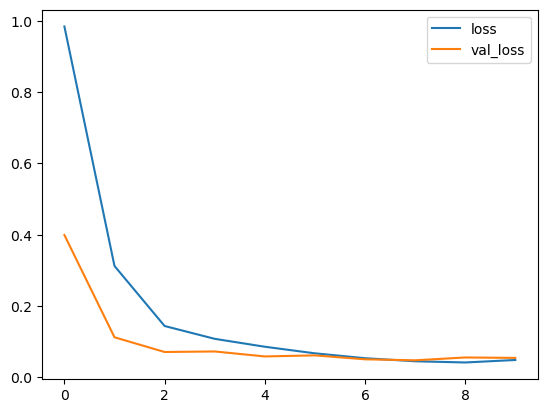

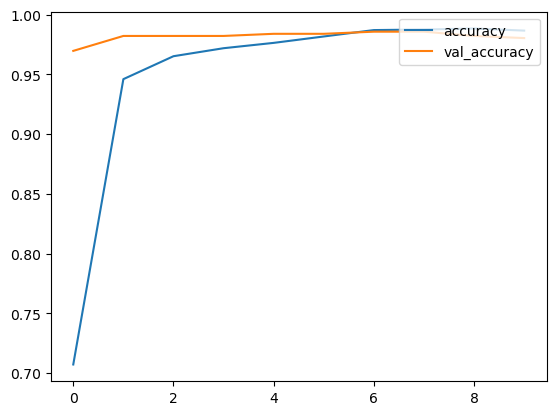

In [ ]:
model.evaluate(val_ds)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

👉 Berdasarkan grafik loss di atas, dapat terlihat bawah nilai loss hasil train dan validation mencapai **konvergensi**, tidak memiliki selisih yang jauh. Jadi, dapat dikatakan model sudah **sangat baik**.

👉 Berdasarkan grafik loss di atas, dapat terlihat bawah nilai akurasi hasil train dan validation juga mencapai **konvergensi**.

👉 Hasil evaluasi model:
> loss = 0.0555
> accuracy = 97.86%

# 6. Preparing for submission ✨

In [ ]:
sub_csv ='/kaggle/input/ofa-ai-mastery-computer-vision/Sample_submission.csv'
path_test = path = '/kaggle/input/ofa-ai-mastery-computer-vision/test/test'

In [ ]:
df_sub = pd.read_csv(sub_csv)
image_id = df_sub['ID']
df_sub.head(10)

,ID,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


**Predict Data Test**

Setiap gambar pada data test diprediksi menggunakan model yang sudah dibangun. Kemudian, hasil tersebut disimpan ke dalam list labels.

In [ ]:
# each image will be treated individually and saved in a list which is then merged with the id of it's correspondence

from tensorflow.keras.preprocessing.image import load_img


# making a list for our predictions
labels = []


for i in image_id:
    image = load_img(path_test+'/'+str(i)+'.jpg', target_size=(324, 324))
    img = np.array(image)
    img = img / 255.0
    img = img.reshape(1,324,324,3)
    label = model.predict(img)
    label_id = label[0].tolist()
    
    labels.append(label_id.index(max(label_id)))


1/1 [==============================] - 0s 34ms/step


Replace data pada kolom Label dengan list labels (data hasil prediksi) sebelumnya.

In [ ]:
# we will replace the previous empty columns with the new predictions    
    
df_sub['Label'] = labels
df_sub.head(10)

,ID,Label
0,1,1
1,2,0
2,3,2
3,4,3
4,5,2
5,6,1
6,7,3
7,8,0
8,9,3
9,10,2


In [ ]:
# saving file

df_sub.to_csv('submission.csv',index=False)

👉 Hasil prediksi disimpan dalam file submission dalam format .csv. Kemudian di upload ke submission kaggle.

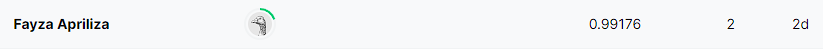